In [ ]:
Lets start by picking a good dataset by inspecting the pictures in both the original state and the preprocessed state.

In [51]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

IMG_SIZE = (160, 160)  # Use a tuple for target_size

# Specify the path to the "Image_choice" directory containing four pictures
IMAGE_CHOICE_PATH = "Image_choice"

# Get a list of image file names in the directory
image_file_names = os.listdir(IMAGE_CHOICE_PATH)

# Create the full paths to the images
image_paths = [os.path.join(IMAGE_CHOICE_PATH, name) for name in image_file_names]



# Create labels for the images
labels = ["Original 1", "Original 2", "Original 3", "Original 4",
          "Preprocessed 1", "Preprocessed 2", "Preprocessed 3", "Preprocessed 4"]

# Plot the images with labels
plt.figure(figsize=(16, 8))

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(original_images[i] if i < 4 else preprocessed_images[i - 4], cmap='gray')  # Specify the colormap
    plt.title(labels[i])
    plt.axis("off")

plt.show()


IndexError: index 1 is out of bounds for axis 2 with size 1

In [29]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Define the path to your dataset folder
data_dir = 'Dataset2/asl_dataset'
letters = sorted(os.listdir(data_dir))

# Load and preprocess the images
def load_images(data_dir, letters):
    images = []
    labels = []
    for i, letter in enumerate(letters):
        letter_dir = os.path.join(data_dir, letter)
        for filename in os.listdir(letter_dir):
            img_path = os.path.join(letter_dir, filename)
            img = load_img(img_path, color_mode='grayscale', target_size=(64, 64))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(i)  # Use index as label
    return np.array(images), np.array(labels)

x_data, y_data = load_images(data_dir, letters)

# Normalize pixel values
x_data = x_data.astype(np.float32) / 255

# Convert labels to one-hot encoding
y_data = to_categorical(y_data, len(letters))

# Split the data into training, validation, and test sets
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

# Build your model as before
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(letters), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/10
23/23 [==============================] - 9s 362ms/step - loss: 1.8487 - accuracy: 0.4277 - val_loss: 1.0914 - val_accuracy: 0.6519
Epoch 2/10
23/23 [==============================] - 8s 368ms/step - loss: 0.4278 - accuracy: 0.8581 - val_loss: 0.2232 - val_accuracy: 0.9061
Epoch 3/10
23/23 [==============================] - 9s 375ms/step - loss: 0.1672 - accuracy: 0.9387 - val_loss: 0.1405 - val_accuracy: 0.9669
Epoch 4/10
23/23 [==============================] - 9s 374ms/step - loss: 0.0677 - accuracy: 0.9814 - val_loss: 0.0493 - val_accuracy: 0.9779
Epoch 5/10
23/23 [==============================] - 8s 356ms/step - loss: 0.0291 - accuracy: 0.9931 - val_loss: 0.0696 - val_accuracy: 0.9779
Epoch 6/10
23/23 [==============================] - 8s 368ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.1270 - val_accuracy: 0.9724
Epoch 7/10
23/23 [==============================] - 9s 399ms/step - loss: 0.0145 - accuracy: 0.9945 - val_loss: 0.0394 - val_accuracy: 0.9890
Epoch 

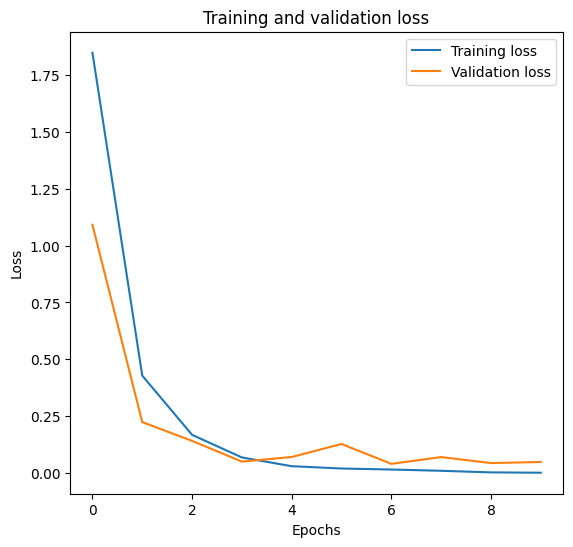

In [30]:
# Plot training and validation loss (same as before)
plt.figure(figsize=(14, 6), facecolor='w')
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# The test accuracy looks very good! The plot also looks pretty good. Some spikes in the middle but the validation line kind of stays close to the training line. Lets evaluate!

1/1 [==============================] - 0s 22ms/step


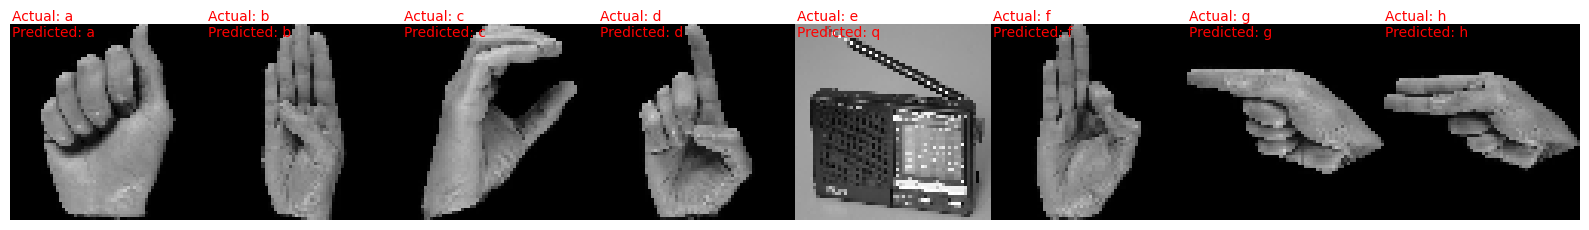

In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def interact_with_user(model, letters):
    image_dir = 'Dataset2/evaluation1'
    class_folders = sorted(os.listdir(image_dir))

    plt.figure(figsize=(16, 4))  # Adjust the figure size as needed for a single row

    image_row = []  # To store images in the current row
    labels = []     # To store labels for images

    for i, folder in enumerate(class_folders):
        class_path = os.path.join(image_dir, folder)
        image_files = os.listdir(class_path)

        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_path, image_file)

            img = load_img(image_path, color_mode='grayscale', target_size=(64, 64))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            actual_class = folder
            predicted_class = letters[np.argmax(model.predict(img_array))]

            image_row.append(np.squeeze(img_array))
            labels.append(f"Actual: {actual_class}\nPredicted: {predicted_class}")

    # Concatenate the images horizontally
    combined_image = np.concatenate(image_row, axis=1)

    plt.imshow(combined_image, cmap='gray', interpolation='none')
    plt.axis('off')

    # Annotate images with labels above them
    for i, label in enumerate(labels):
        col_idx = i * 64  # Adjust the x-coordinate based on the position within the row
        plt.text(col_idx, -5, label, fontsize=10, color='red', verticalalignment='top')

    plt.tight_layout()
    plt.show()

# Interact with the user and display all images in a single row with labels
interact_with_user(model, letters)


In [32]:
# This is weird. It looks like it is basing its predictions on the alphabetical order maybe it has access to the classes based on the folder names.
# I will try to delete the folders and see if it still works.

1/1 [==============================] - 0s 21ms/step


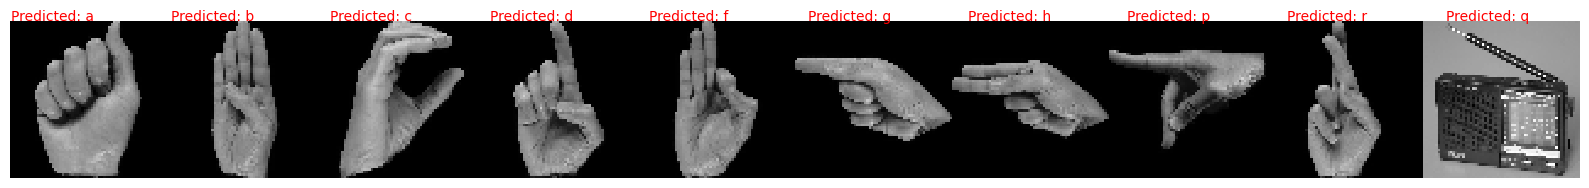

In [48]:
def interact_with_user(model, letters):
    image_dir = 'Dataset2/evaluation'  # Update the path to the folder containing the 8 images
    image_files = os.listdir(image_dir)

    plt.figure(figsize=(16, 4))  # Adjust the figure size as needed for a single row

    image_row = []  # To store images in the current row
    predicted_classes = []  # To store predicted classes

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)

        img = load_img(image_path, color_mode='grayscale', target_size=(64, 64))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        predicted_class = letters[np.argmax(model.predict(img_array))]

        image_row.append(np.squeeze(img_array))
        predicted_classes.append(predicted_class)

    # Concatenate the images horizontally
    combined_image = np.concatenate(image_row, axis=1)

    plt.imshow(combined_image, cmap='gray', interpolation='none')
    plt.axis('off')

    # Annotate images with predicted labels only
    for i, predicted_class in enumerate(predicted_classes):
        plt.text(i * 65, -5, f"Predicted: {predicted_class}", fontsize=10, color='red', verticalalignment='top')

    plt.tight_layout()
    plt.show()

# Interact with the user and display all 8 images in a single row with predicted labels
interact_with_user(model, letters)


In [34]:
# Now Ive scrambled the pictures, deleted the folders and added some more pictures which skips some letters in the alphabetical order. I have double checked that
# the picture represents the predicted class so this is good!

1/1 [==============================] - 0s 22ms/step


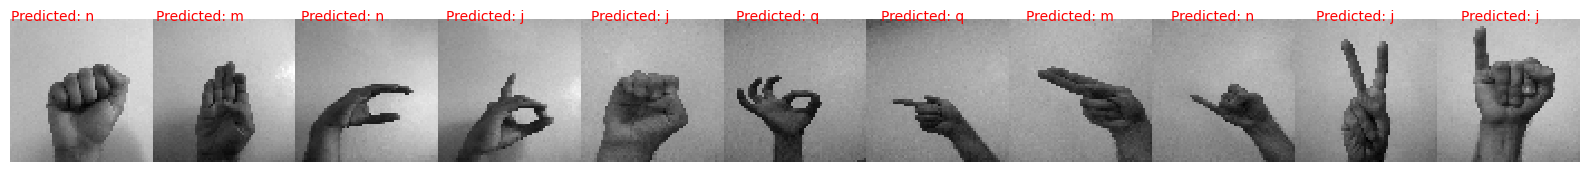

In [49]:
def interact_with_user(model, letters):
    image_dir = 'Dataset2/evaluation2'  # Update the path to the folder containing the 8 images
    image_files = os.listdir(image_dir)

    plt.figure(figsize=(16, 4))  # Adjust the figure size as needed for a single row

    image_row = []  # To store images in the current row
    predicted_classes = []  # To store predicted classes

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)

        img = load_img(image_path, color_mode='grayscale', target_size=(64, 64))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        predicted_class = letters[np.argmax(model.predict(img_array))]

        image_row.append(np.squeeze(img_array))
        predicted_classes.append(predicted_class)

    # Concatenate the images horizontally
    combined_image = np.concatenate(image_row, axis=1)

    plt.imshow(combined_image, cmap='gray', interpolation='none')
    plt.axis('off')

    # Annotate images with predicted labels only
    for i, predicted_class in enumerate(predicted_classes):
        plt.text(i * 65, -5, f"Predicted: {predicted_class}", fontsize=10, color='red', verticalalignment='top')

    plt.tight_layout()
    plt.show()

# Interact with the user and display all 8 images in a single row with predicted labels
interact_with_user(model, letters)

1/1 [==============================] - 0s 21ms/step


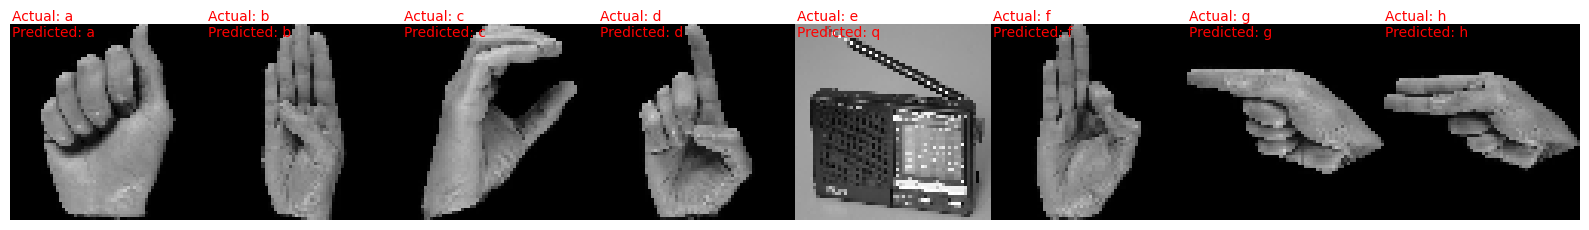

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def interact_with_user(model, letters):
    image_dir = 'Dataset2/evaluation1'
    class_folders = sorted(os.listdir(image_dir))

    plt.figure(figsize=(16, 4))  # Adjust the figure size as needed for a single row

    image_row = []  # To store images in the current row
    labels = []     # To store labels for images

    for i, folder in enumerate(class_folders):
        class_path = os.path.join(image_dir, folder)
        image_files = os.listdir(class_path)

        for j, image_file in enumerate(image_files):
            image_path = os.path.join(class_path, image_file)

            img = load_img(image_path, color_mode='grayscale', target_size=(64, 64))
            img_array = img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            actual_class = folder
            predicted_class = letters[np.argmax(model.predict(img_array))]

            image_row.append(np.squeeze(img_array))
            labels.append(f"Actual: {actual_class}\nPredicted: {predicted_class}")

    # Concatenate the images horizontally
    combined_image = np.concatenate(image_row, axis=1)

    plt.imshow(combined_image, cmap='gray', interpolation='none')
    plt.axis('off')

    # Annotate images with labels above them
    for i, label in enumerate(labels):
        col_idx = i * 64  # Adjust the x-coordinate based on the position within the row
        plt.text(col_idx, -5, label, fontsize=10, color='red', verticalalignment='top')

    plt.tight_layout()
    plt.show()

# Interact with the user and display all images in a single row with labels
interact_with_user(model, letters)
